In [22]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Load shapefiles

In [29]:
ca_state_outline = gpd.read_file('/home/jovyan/shared/deep_well/data/shapefiles/california_state_outline/CA_State_TIGER2016.shp')

In [31]:
ca_state_outline.to_crs(epsg=4326, inplace=True)

In [32]:
ca_state_outline.crs

{'init': 'epsg:4326', 'no_defs': True}

In [ ]:
cbgs = cbgs[['GEOID10','geometry']]
cbgs.rename(columns={'GEOID10':'fips'}, inplace=True)
cbgs['fips'] = pd.to_numeric(cbgs['fips'])
#cbgs.dtypes
#cbgs.head()
#cbgs.crs
cbgs['geometry'] = cbgs['geometry'].to_crs(epsg=4326)

# Load CASGEM data

In [23]:
!ls /home/jovyan/shared/deep_well/data/casgem

measurements.csv		periodic_gwl_bulkdatadownload.zip
MeasurementsDataDictionary.csv	README
metadata.txt			stations.csv
perforations.csv		StationsDataDictionary.csv
PerforationsDataDictionary.csv


In [14]:
df_stations = pd.read_csv('/home/jovyan/shared/deep_well/data/casgem/stations.csv')

In [8]:
df_stations.head()

,STN_ID,SITE_CODE,SWN,WELL_NAME,LATITUDE,LONGITUDE,WLM_METHOD,WLM_ACC,BASIN_CODE,BASIN_NAME,COUNTY_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO
0,51445,320000N1140000W001,NaN,Bay Ridge,35.5604,-121.755,USGS quad,Unknown,NaN,NaN,Monterey,NaN,Residential,Part of a nested/multi-completion well,NaN
1,25067,325450N1171061W001,19S02W05K003S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN
2,25068,325450N1171061W002,19S02W05K004S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN
3,39833,325450N1171061W003,19S02W05K005S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN
4,25069,325450N1171061W004,19S02W05K006S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN


In [17]:
gdf = gpd.GeoDataFrame(df_stations, geometry=gpd.points_from_xy(df_stations['LONGITUDE'], df_stations['LATITUDE']))

In [24]:
gdf.crs = {'init' :'epsg:4326'}

### All wells

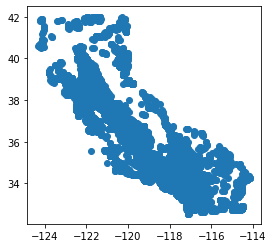

In [46]:
#fig,axes = plt.subplots(1, 2, figsize = (20,15))
#ax = ca_state_outline.plot(color=None, edgecolor='gray', linewidth=3)
gdf.plot()

### Wells w/ data btwn 2000 and 2019

In [26]:
gdf.head()

,STN_ID,SITE_CODE,SWN,WELL_NAME,LATITUDE,LONGITUDE,WLM_METHOD,WLM_ACC,BASIN_CODE,BASIN_NAME,COUNTY_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,geometry
0,51445,320000N1140000W001,NaN,Bay Ridge,35.5604,-121.755,USGS quad,Unknown,NaN,NaN,Monterey,NaN,Residential,Part of a nested/multi-completion well,NaN,POINT (-121.755 35.5604)
1,25067,325450N1171061W001,19S02W05K003S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,POINT (-117.106 32.545)
2,25068,325450N1171061W002,19S02W05K004S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,POINT (-117.106 32.545)
3,39833,325450N1171061W003,19S02W05K005S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,POINT (-117.106 32.545)
4,25069,325450N1171061W004,19S02W05K006S,NaN,32.5450,-117.106,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,POINT (-117.106 32.545)


In [9]:
df_measurements = pd.read_csv('/home/jovyan/shared/deep_well/data/casgem/measurements.csv')

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df_measurements.head()

,STN_ID,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,RDNG_WS,RDNG_RP,WSE,RPE_WSE,GSE_WSE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_ID,WLM_ORG_NAME,MSMT_CMT,COOP_AGENCY_ORG_ID,COOP_ORG_NAME
0,2000,341081N1188965W001,1645374,1979-04-19 00:00:00,2077.61,2077.61,0.0,100.2,1977.41,100.2,100.2,NaN,Unknown,Water level accuracy is unknown,1,Department of Water Resources,NaN,1082,VENTURA COUNTY FLOOD CONTROL DISTRICT
1,2001,341067N1188976W001,1645375,1979-04-19 00:00:00,2077.61,2077.61,0.0,116.7,1960.91,116.7,116.7,NaN,Unknown,Water level accuracy is unknown,1,Department of Water Resources,NaN,1082,VENTURA COUNTY FLOOD CONTROL DISTRICT
2,2002,341072N1189440W001,1645376,1979-04-19 00:00:00,1779.63,1779.63,NaN,NaN,NaN,NaN,NaN,Temporarily inaccessible,NaN,NaN,1,Department of Water Resources,NaN,1082,VENTURA COUNTY FLOOD CONTROL DISTRICT
3,2003,341019N1189556W001,1645377,1979-04-18 00:00:00,1452.63,1452.63,0.0,10.2,1442.43,10.2,10.2,NaN,Unknown,Water level accuracy is unknown,1,Department of Water Resources,NaN,1082,VENTURA COUNTY FLOOD CONTROL DISTRICT
4,2004,340953N1189587W001,1645378,1979-04-18 00:00:00,1502.61,1502.61,0.0,55.4,1447.21,55.4,55.4,NaN,Unknown,Water level accuracy is unknown,1,Department of Water Resources,NaN,1082,VENTURA COUNTY FLOOD CONTROL DISTRICT


In [12]:
df_measurements.tail()

,STN_ID,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,RDNG_WS,RDNG_RP,WSE,RPE_WSE,GSE_WSE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_ID,WLM_ORG_NAME,MSMT_CMT,COOP_AGENCY_ORG_ID,COOP_ORG_NAME
1699452,53195,363861N1201148W002,2474724,2010-12-07 00:00:00,255.0,255.0,NaN,NaN,NaN,NaN,NaN,Pumping,NaN,NaN,5100,Westlands Water District,NaN,5100,Westlands Water District
1699453,53195,363861N1201148W002,2474723,2009-11-17 00:00:00,255.0,255.0,0.0,291.0,-36.0,291.0,291.0,NaN,Acoustic or sonic sounder,Water level accuracy to nearest foot,5100,Westlands Water District,NaN,5100,Westlands Water District
1699454,53195,363861N1201148W002,2474722,2008-12-03 00:00:00,255.0,255.0,0.0,220.0,35.0,220.0,220.0,NaN,Acoustic or sonic sounder,Water level accuracy to nearest foot,5100,Westlands Water District,NaN,5100,Westlands Water District
1699455,53195,363861N1201148W002,2474721,2007-12-17 00:00:00,255.0,255.0,0.0,218.0,37.0,218.0,218.0,NaN,Acoustic or sonic sounder,Water level accuracy to nearest foot,5100,Westlands Water District,NaN,5100,Westlands Water District
1699456,53195,363861N1201148W002,2474720,2006-12-01 00:00:00,255.0,255.0,0.0,197.0,58.0,197.0,197.0,NaN,Acoustic or sonic sounder,Water level accuracy to nearest foot,5100,Westlands Water District,NaN,5100,Westlands Water District


In [11]:
df_measurements.shape

(1699457, 19)